# Data science Lab 3

## Problem 2

### Scrape the PDFs

In [58]:
#
#wget


### Parse all the PDFs

## Problem 3

### Problem 1. Following the Kaggle tutorial

#### 1. Kaggle account made

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [60]:
train = pd.read_csv("kaggle/train.csv")
test = pd.read_csv("kaggle/test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [61]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Problem 2. Data preprocessing

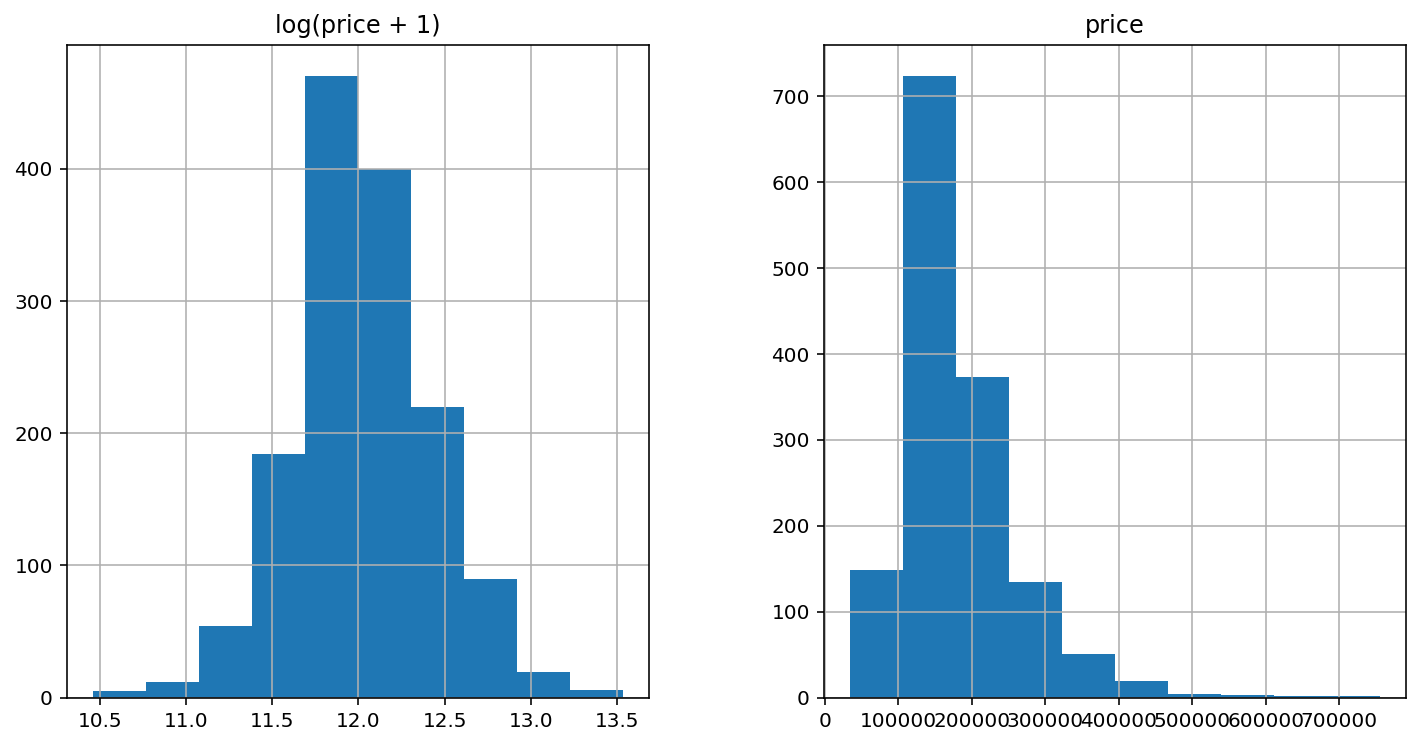

In [62]:
#First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
#Create Dummy variables for the categorical features
#Replace the numeric missing values (NaN's) with the mean of their respective columns
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist() #visualize log prices
plt.show()


In [63]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [64]:
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice
all_data[skewed_feats]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.000000,0.000000,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.000000,0.000000,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.000000,0.000000,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.000000,0.000000,0.0,0.000000
5,3.931826,4.454347,9.555064,0.000000,6.597146,0.000000,4.174387,6.680855,6.680855,6.340359,...,7.217443,0.000000,0.693147,3.713572,3.433987,0.000000,5.771441,0.000000,0.0,6.552508
6,3.044522,4.330733,9.218804,5.231109,7.222566,0.000000,5.762051,7.430707,7.435438,0.000000,...,7.435438,0.000000,0.693147,5.545177,4.060443,0.000000,0.000000,0.000000,0.0,0.000000
7,4.110874,4.196175,9.247925,5.484797,6.756932,3.496508,5.379897,7.010312,7.010312,6.891626,...,7.645398,0.000000,0.693147,5.463832,5.323010,5.433722,0.000000,0.000000,0.0,5.860786
8,3.931826,3.951244,8.719481,0.000000,0.000000,0.000000,6.859615,6.859615,6.930495,6.624065,...,7.481556,0.000000,1.098612,4.510860,0.000000,5.327876,0.000000,0.000000,0.0,0.000000
9,5.252273,3.931826,8.912069,0.000000,6.747587,0.000000,4.948760,6.899723,6.982863,0.000000,...,6.982863,0.000000,1.098612,0.000000,1.609438,0.000000,0.000000,0.000000,0.0,0.000000


### Problem 2. Ridge Regression

In [65]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

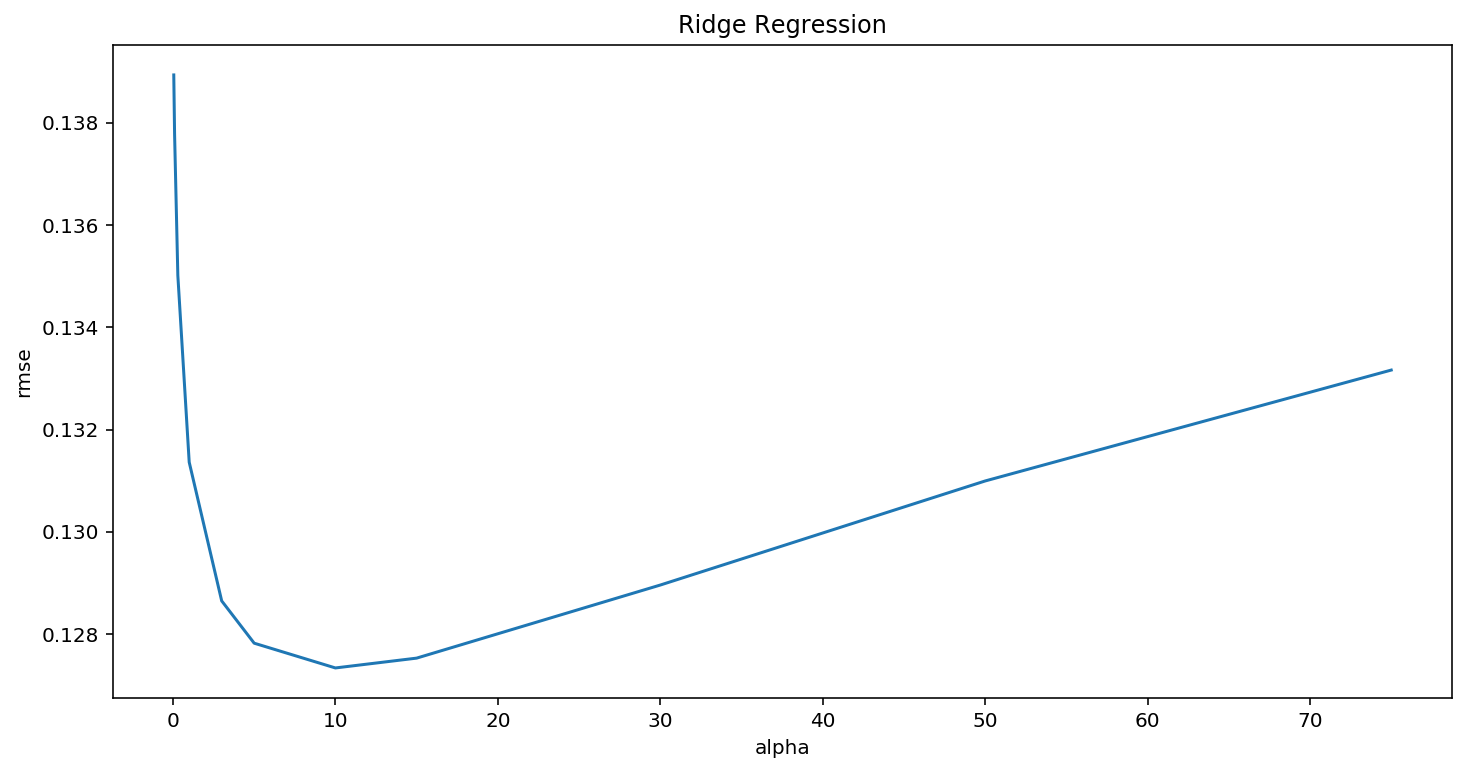

In [66]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [67]:
cv_ridge.min()


0.12733734668670754

In [68]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

rmse_cv(model_lasso).mean()

0.12314421090977432

#### 2. RMSE = 0.127

### Problem 3. Lasso Regression

In [69]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()


0.12314421090977432

#### 3. The lasso regression model performs better

In [70]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef==0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


### Problem 4. Lasso nonzero coefficients

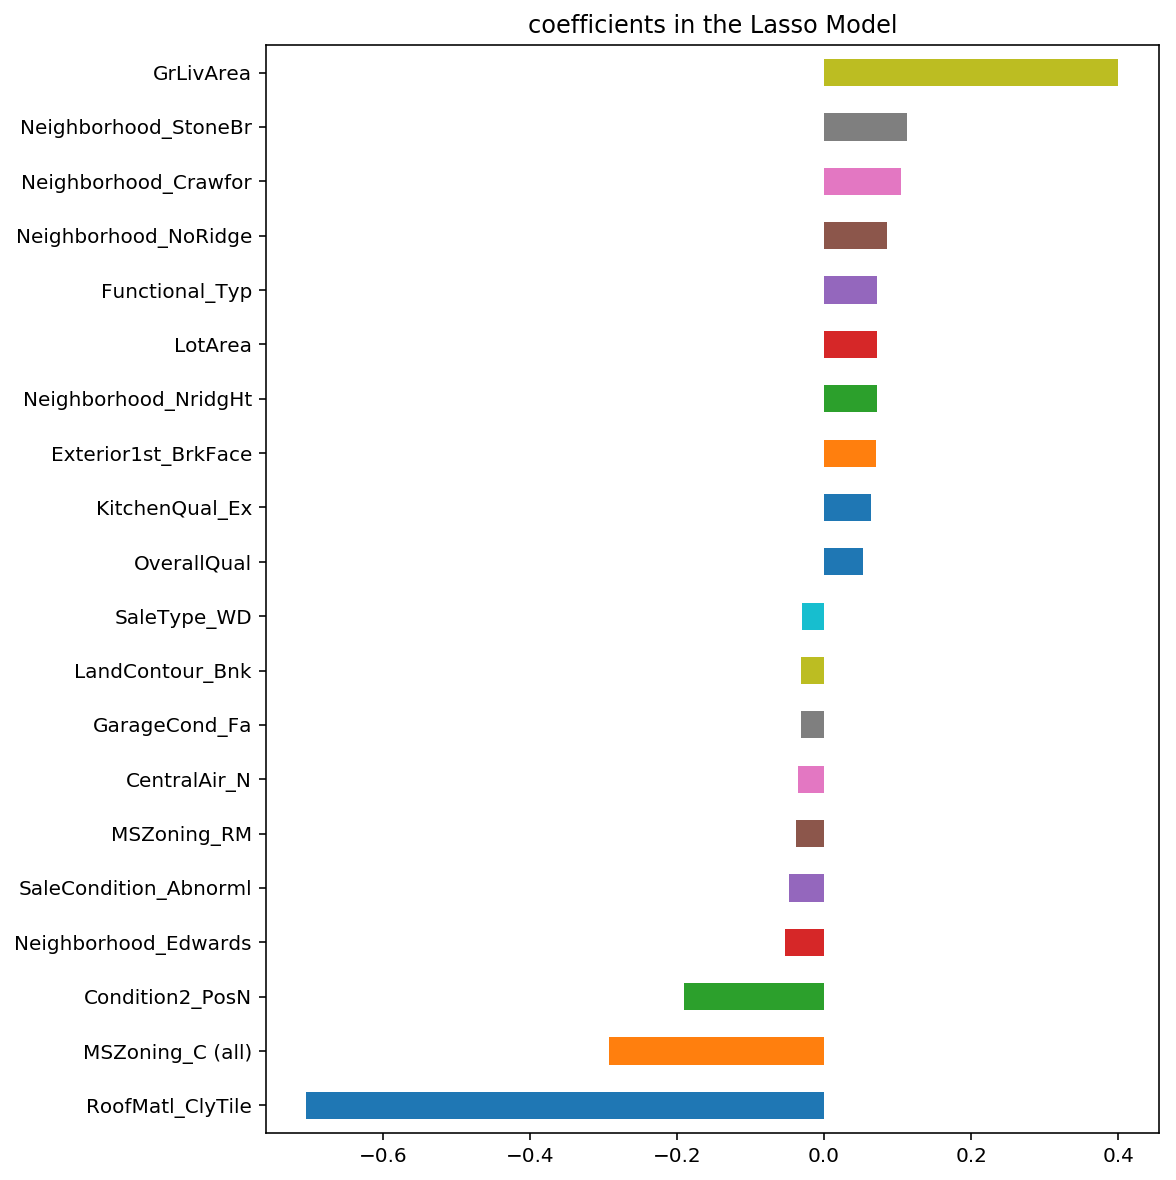

In [71]:
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("coefficients in the Lasso Model")
plt.show()

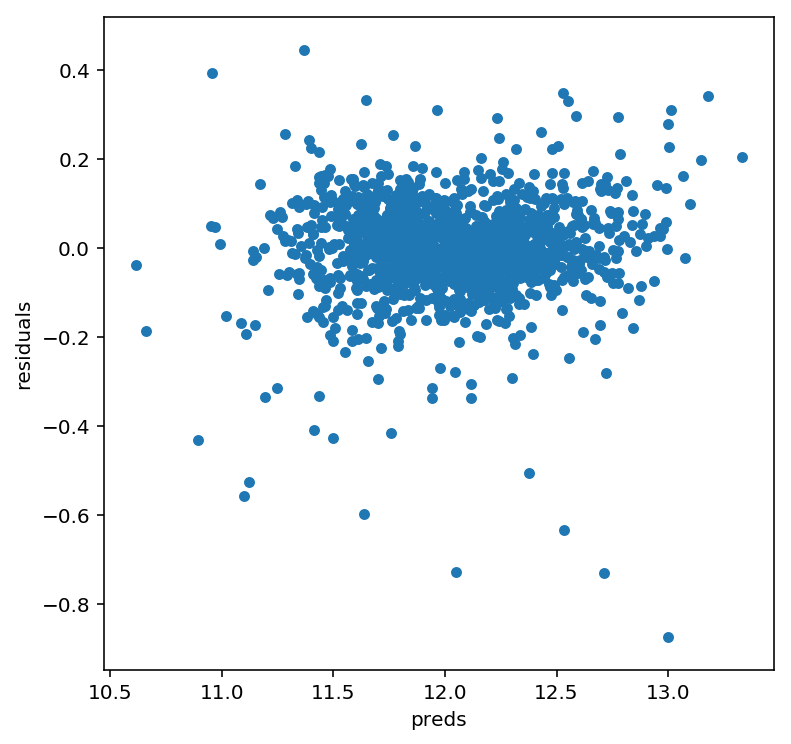

In [72]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")
plt.show()

### Problem 5. Ensembling and Stacking

In [95]:
## add outputs of lasso as features to ridge
#newtrain = pd.DataFrame()
#cv_lasso = [rmse_cv(LassoCV(alpha = alpha)).mean()]
#model_lasso()
#all_data['Lasso'] = all_data.apply(lambda row: model_lasso.predict(row))
X_train_stack = pd.DataFrame(X_train)
X_train_stack['Lasso'] = X_train_stack.apply(lambda row: model_lasso.predict([row]),axis=1)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

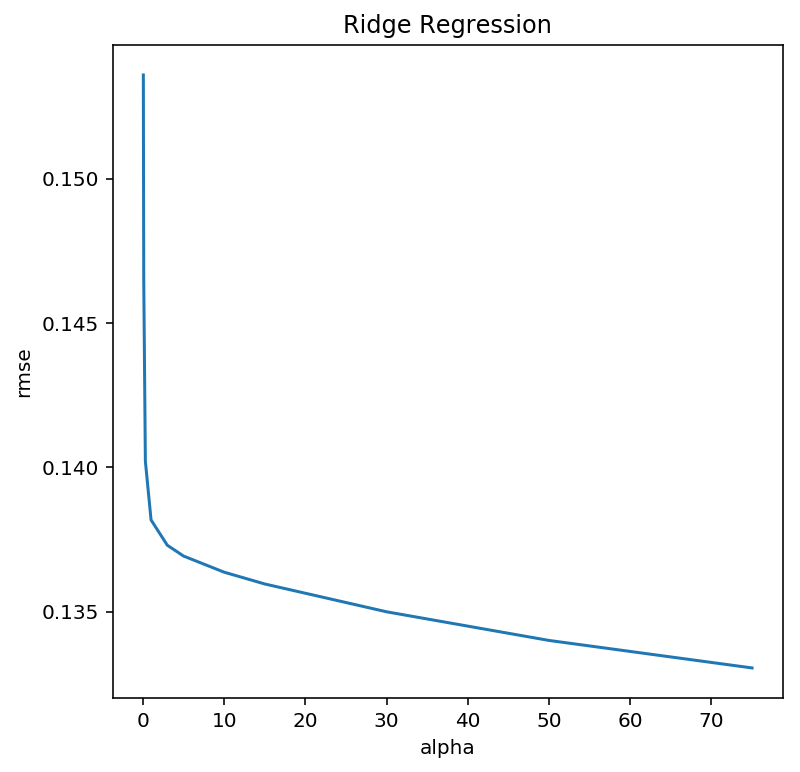

In [96]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [97]:
cv_ridge.min()


0.13304871481642983

### Problem 6. Single XGB

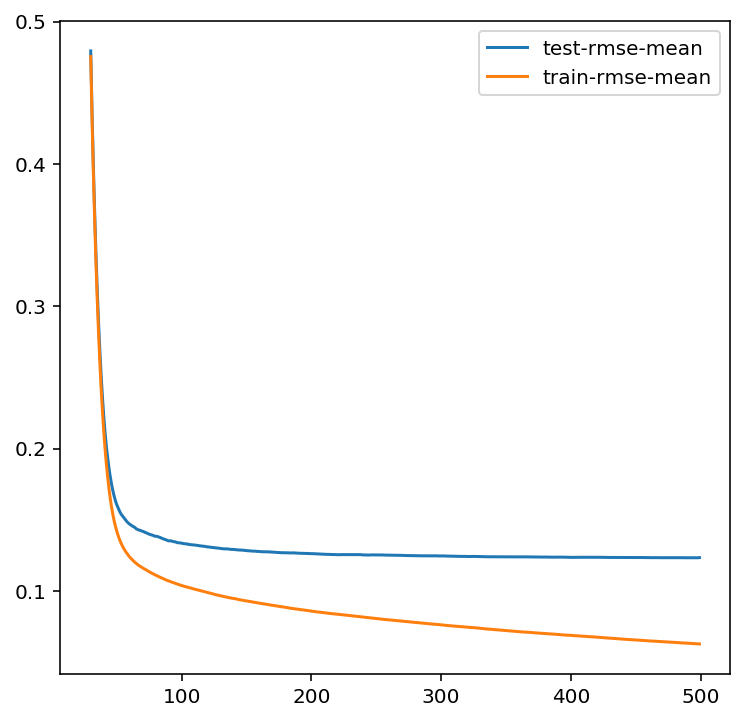

In [74]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)
params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain, num_boost_round = 500, early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean","train-rmse-mean"]].plot()
plt.show()

#### 6. base score = 0.5, outperforms Lasso

### Problem 7. Stacking Models and Exporting Data

In [75]:
model_xgb = xgb.XGBRegressor(n_estimators = 360, max_depth = 2, learning_rate= 0.1)
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

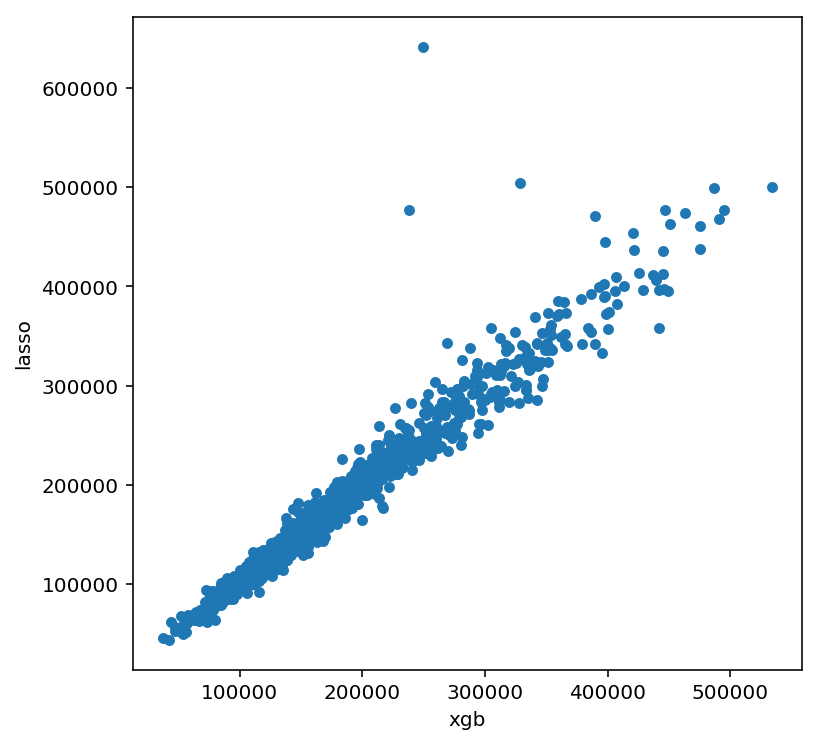

In [76]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x="xgb", y="lasso", kind="scatter")
plt.show()

In [77]:
preds = 0.7*lasso_preds + 0.3*xgb_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

### Problem 8. Extra Exploration

#### Keras

In [78]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

X_train = StandardScaler().fit_transform(X_train)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state=3)


X_tr.shape

(1095, 288)

In [79]:
X_tr

array([[ 1.00573733,  0.68066137, -0.46001991, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.12520184,  0.60296111,  0.03113183, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.12520184, -0.02865265, -0.74027492, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.16426234, -0.87075036, -0.81954431, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 0.92361154, -0.30038284, -0.44275864, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.83656519,  1.98505948,  0.46455838, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [80]:
model = Sequential()
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))
model.compile(loss = "mse", optimizer = "adam")

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=288, kernel_regularizer=<keras.reg...)`
  


In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [82]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

Train on 1095 samples, validate on 365 samples
Epoch 1/1
1095/1095 [==============================] - 0s 347us/step - loss: 147.0251 - val_loss: 149.9540


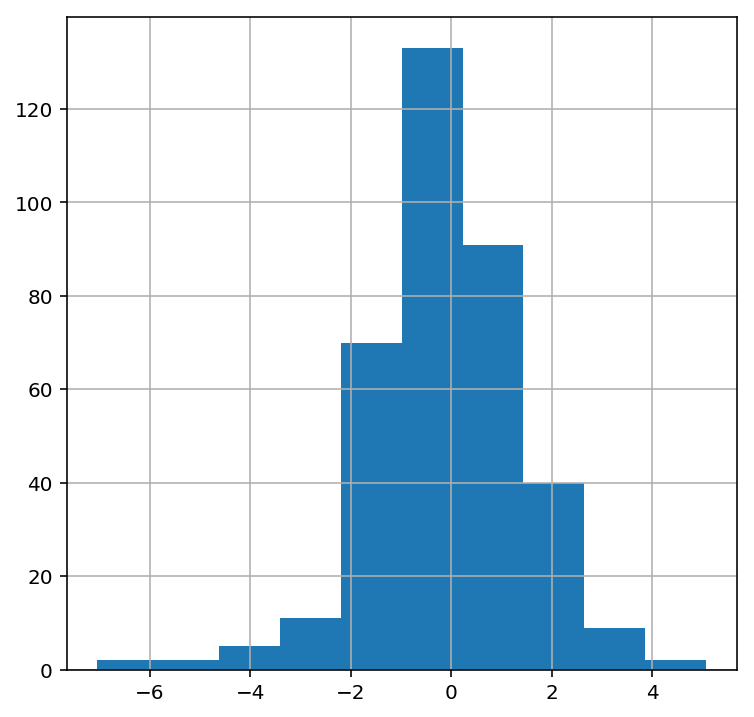

In [83]:
pd.Series(model.predict(X_val)[:,0]).hist()
plt.show()